In [1]:
import keras
from keras.layers import Dense, LSTM, Flatten, TimeDistributed, Conv2D, Dropout, MaxPooling2D
from keras import Sequential
from keras.models import Model
import glob
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.resnet50 import ResNet50
from keras.applications import Xception
from keras.applications.resnet50 import decode_predictions, preprocess_input
from scipy import spatial
from matplotlib.patches import Rectangle
from PIL import Image
import cv2
%matplotlib inline

Using TensorFlow backend.
/Users/ericcriteser/anaconda2/lib/python2.7/site-packages/cryptography/hazmat/primitives/constant_time.py:26: CryptographyDeprecationWarning: Support for your Python version is deprecated. The next version of cryptography will remove support. Please upgrade to a release (2.7.7+) that supports hmac.compare_digest as soon as possible.
  utils.PersistentlyDeprecated2018,


In [2]:
#return distance between vector points
def vector_dist(v1, v2):
    #result = spatial.distance.cosine(dataSetI, dataSetII)
    return spatial.distance.cdist(v1, v2)

In [3]:
#return subarray from full image
def get_img_slice(t_img, x, y, model_width):
    t_array = t_img[x: x + model_width, y: y + model_width, :]
    return t_array

In [4]:
#return model
def get_model():
    res_model = ResNet50(include_top=False, weights = 'imagenet', input_shape = (224, 224, 3))
    max_pool = MaxPooling2D()(res_model.output)
    max_pool2 = MaxPooling2D()(max_pool)
    flat_1 = Flatten()(max_pool2)
    model = Model(inputs = res_model.inputs, outputs = flat_1)
    model.compile(optimizer = 'rmsprop', loss = "categorical_crossentropy", metrics = ['accuracy'])
    return model

In [5]:
#return prediction
def get_pred(t_img):
    t_test = image.img_to_array(t_img)
    t_test = np.expand_dims(t_test, axis=0)
    t_test = preprocess_input(t_test)
    return model.predict(t_test)

In [6]:
#return value from x/y index
def return_xy(idx):
    t_x = rand_x[idx : idx + 1]
    t_y = rand_y[idx : idx + 1]
    return int(t_x), int(t_y)

In [7]:
model_width = 224

In [8]:
model = get_model()

/Users/ericcriteser/anaconda2/lib/python2.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [11]:
#full image view and full image as array
img = image.load_img("ny_resized.jpg")
full_img = image.img_to_array(img)

/Users/ericcriteser/anaconda2/lib/python2.7/site-packages/PIL/Image.py:2438: DecompressionBombWarning: Image size (225000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


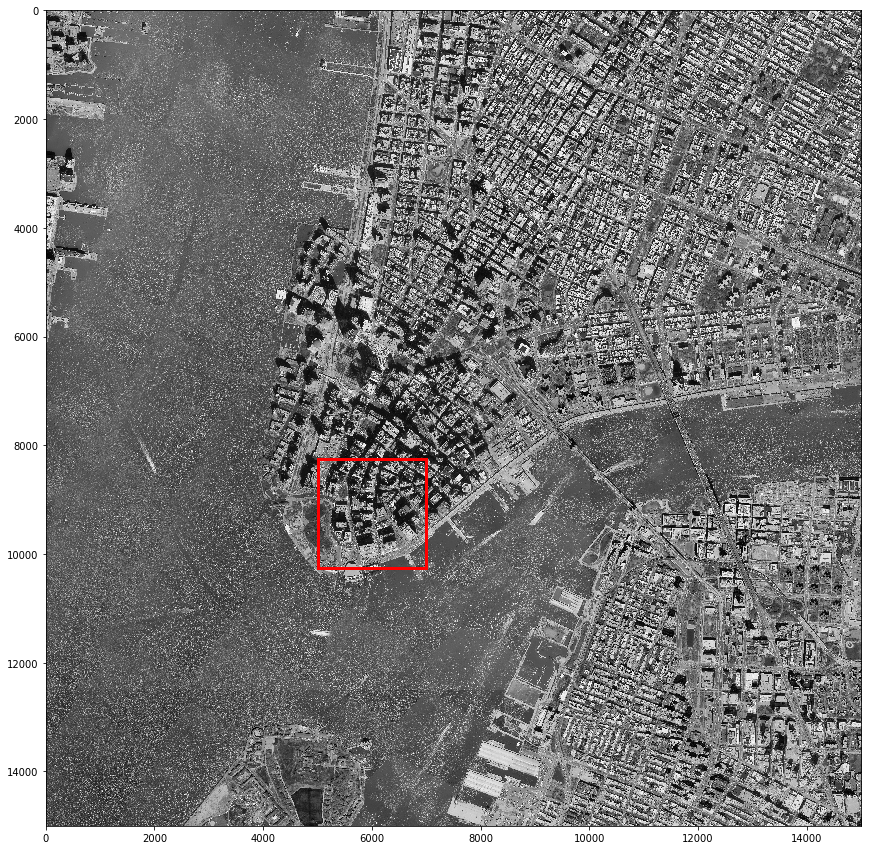

In [12]:
plt.figure(figsize = (15,15))
plt.gca().add_patch(Rectangle((5000, 8250),2000,2000,linewidth=3,edgecolor='r',facecolor='none'));
plt.imshow(np.asarray(img));

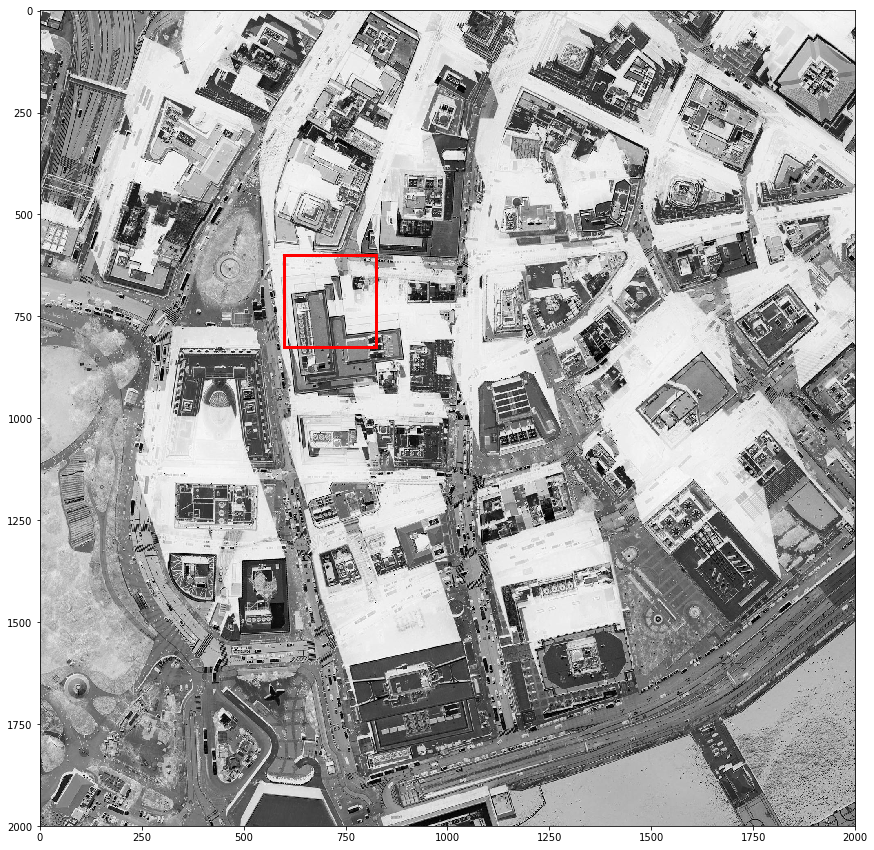

In [13]:
#return subarray from full image
tee_ny = full_img[8250 : 10250, 5000 :  7000, :]
tee_ny_img = image.array_to_img(tee_ny)
plt.figure(figsize = (15,15))
plt.gca().add_patch(Rectangle((600,600),224,224,linewidth=3,edgecolor='r',facecolor='none'));
plt.imshow(tee_ny);

In [14]:
x_start_num = 600 - model_width 
y_start_num = 600 - model_width
x_finish_num = 600 + (model_width*2)
y_finish_num = 600 + (model_width*2)

(672, 672, 3)


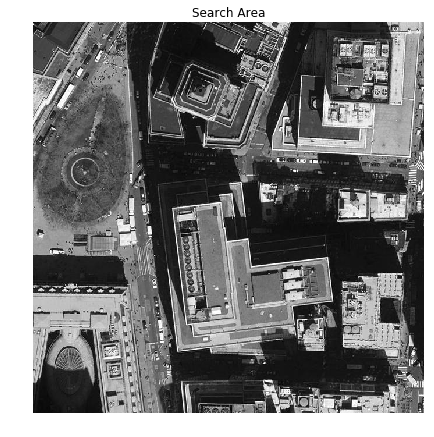

In [15]:
search_img = tee_ny[x_start_num:x_finish_num, y_start_num: y_finish_num]
print(search_img.shape)
search_img = image.array_to_img(search_img)
plt.figure(figsize = (7,10))
plt.title('Search Area')
plt.axis('off')
plt.imshow(search_img);

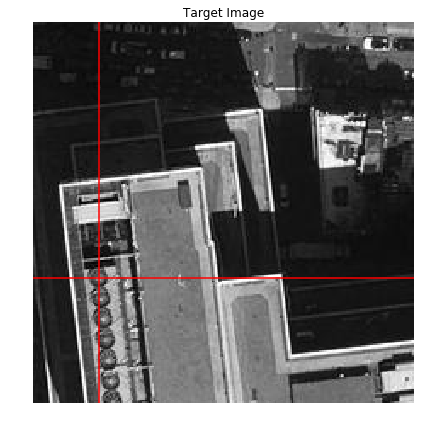

In [16]:
#Target Image and target to predict
x_img = image.img_to_array(tee_ny)
x_img_array = get_img_slice(x_img, 600, 600, model_width)
x_img = image.array_to_img(x_img_array)
goal_pred = get_pred(x_img)
plt.figure(figsize = (7,7))
plt.title('Target Image')
plt.axvline(x=38,color='red')
plt.axhline(y=150,color='red')
plt.axis('off')
plt.imshow(x_img);

In [18]:
num_samples = 500
rand_x = np.random.randint(x_start_num, x_finish_num, num_samples)
rand_y = np.random.randint(y_start_num, y_finish_num, num_samples)
#random search of x, y to shrink window
dist_array = []
for i in range(len(rand_x)):
    test_slice = get_img_slice(tee_ny, rand_x[i], rand_y[i], model_width)
    test_img = image.array_to_img(test_slice)
    dist_array.append(vector_dist(goal_pred, get_pred(test_img))[0][0])

In [19]:
#x,y for prediction
x, y = return_xy(np.argmin(dist_array))

In [20]:
x_start_num2 = x
y_start_num2 = y
num_samples = 500
rand_x2 = np.random.randint((x_start_num2 - 50), (x_start_num2 + 50), num_samples)
rand_y2 = np.random.randint((y_start_num2 - 50), (y_start_num2 + 50), num_samples)

In [21]:
#random search of narrowed window
dist_array2 = []
for i in range(len(rand_x2)):
    test_slice = get_img_slice(tee_ny, rand_x2[i], rand_y2[i], model_width)
    test_img = image.array_to_img(test_slice)
    dist_array2.append(vector_dist(goal_pred, get_pred(test_img))[0][0])

In [22]:
min_score_idx = np.argmin(dist_array2)

In [23]:
x = rand_x2[min_score_idx : min_score_idx + 1][0]
y = rand_y2[min_score_idx : min_score_idx + 1][0]

In [24]:
x_start_num3 = x
y_start_num3 = y
num_samples = 500
rand_x3 = np.random.randint((x_start_num3 - 5), (x_start_num3 + 5), num_samples)
rand_y3 = np.random.randint((y_start_num3 - 5), (y_start_num3 + 5), num_samples)

In [25]:
#random search of narrowed window
dist_array3 = []
for i in range(len(rand_x3)):
    test_slice = get_img_slice(tee_ny, rand_x3[i], rand_y3[i], model_width)
    test_img = image.array_to_img(test_slice)
    dist_array3.append(vector_dist(goal_pred, get_pred(test_img))[0][0])

In [26]:
min_score_idx = np.argmin(dist_array3)

In [27]:
x = rand_x3[min_score_idx : min_score_idx + 1][0]
y = rand_y3[min_score_idx : min_score_idx + 1][0]

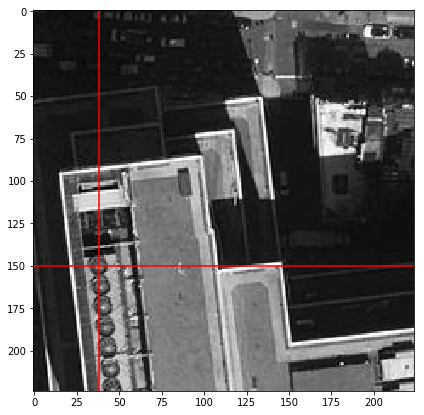

In [28]:
z_img = get_img_slice(tee_ny, x, y, model_width)
z_img = image.array_to_img(z_img)
plt.figure(figsize = (7,7))
plt.axvline(x=38,color='red')
plt.axhline(y=150,color='red')
plt.imshow(z_img);

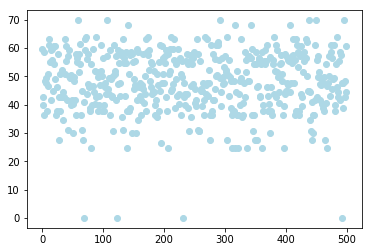

In [29]:
plt.scatter(range(len(rand_x)), dist_array3, color = 'lightblue');

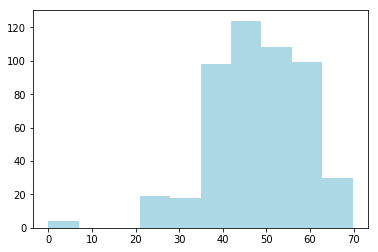

In [35]:
plt.hist(dist_array3, color = 'lightblue');